<a href="https://colab.research.google.com/github/arahmanmdmajid/DS_AI_11/blob/main/EDA_group_Class_Activity_5_May_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df =pd.read_csv('/content/drive/MyDrive/Atomcamp DS&AI Bootcamp 2025/EDA/_cafe_sales.csv',na_values=['UNKNOWN','ERROR'])
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,NaN,NaN,2023-08-30
9996,TXN_9659401,NaN,3.0,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3.0,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9031 non-null   object 
 2   Quantity          9521 non-null   float64
 3   Price Per Unit    9467 non-null   float64
 4   Total Spent       9498 non-null   float64
 5   Payment Method    6822 non-null   object 
 6   Location          6039 non-null   object 
 7   Transaction Date  9540 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


In [5]:
df.describe()

,Quantity,Price Per Unit,Total Spent
count,9521.000000,9467.000000,9498.000000
mean,3.028463,2.949984,8.924352
std,1.419007,1.278450,6.009919
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,8.000000
75%,4.000000,4.000000,12.000000
max,5.000000,5.000000,25.000000


In [6]:
df.shape

(10000, 8)

In [7]:
#Detect Missing values
df.isnull().sum()

,0
Transaction ID,0
Item,969
Quantity,479
Price Per Unit,533
Total Spent,502
Payment Method,3178
Location,3961
Transaction Date,460


In [8]:
missing_count = df.isnull().sum()
missing_precentage = missing_count / len(df) * 100
print("missing_count")
print("-------------")
print(missing_count)
print("----------------------------------")
print("missing_percentage")
print("-------------")
print(missing_precentage)

missing_count
-------------
Transaction ID         0
Item                 969
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64
----------------------------------
missing_percentage
-------------
Transaction ID       0.00
Item                 9.69
Quantity             4.79
Price Per Unit       5.33
Total Spent          5.02
Payment Method      31.78
Location            39.61
Transaction Date     4.60
dtype: float64


In [9]:
for col in df.columns:
  print(col)
  print(df[col].nunique())
  print(df[col].value_counts())
  print("----------------------------------")

Transaction ID
10000
Transaction ID
TXN_9226047    1
TXN_8567525    1
TXN_4583012    1
TXN_6796890    1
TXN_9933628    1
              ..
TXN_3160411    1
TXN_7034554    1
TXN_4271903    1
TXN_4977031    1
TXN_1961373    1
Name: count, Length: 10000, dtype: int64
----------------------------------
Item
8
Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
Name: count, dtype: int64
----------------------------------
Quantity
5
Quantity
5.0    2013
2.0    1974
4.0    1863
3.0    1849
1.0    1822
Name: count, dtype: int64
----------------------------------
Price Per Unit
6
Price Per Unit
3.0    2429
4.0    2331
2.0    1227
5.0    1204
1.0    1143
1.5    1133
Name: count, dtype: int64
----------------------------------
Total Spent
17
Total Spent
6.0     979
12.0    939
3.0     930
4.0     923
20.0    746
15.0    734
8.0     677
10.0    524
2.0     497
9.0     479
5.0     468
16.0    444
25.0    259
7.5

In [10]:
df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [11]:
df['Price Per Unit']= pd.to_numeric(df['Price Per Unit'],errors='coerce')
df['Quantity']= pd.to_numeric(df['Quantity'],errors='coerce')
df['Total Spent']= pd.to_numeric(df['Total Spent'],errors='coerce')
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9031 non-null   object        
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    6822 non-null   object        
 6   Location          6039 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


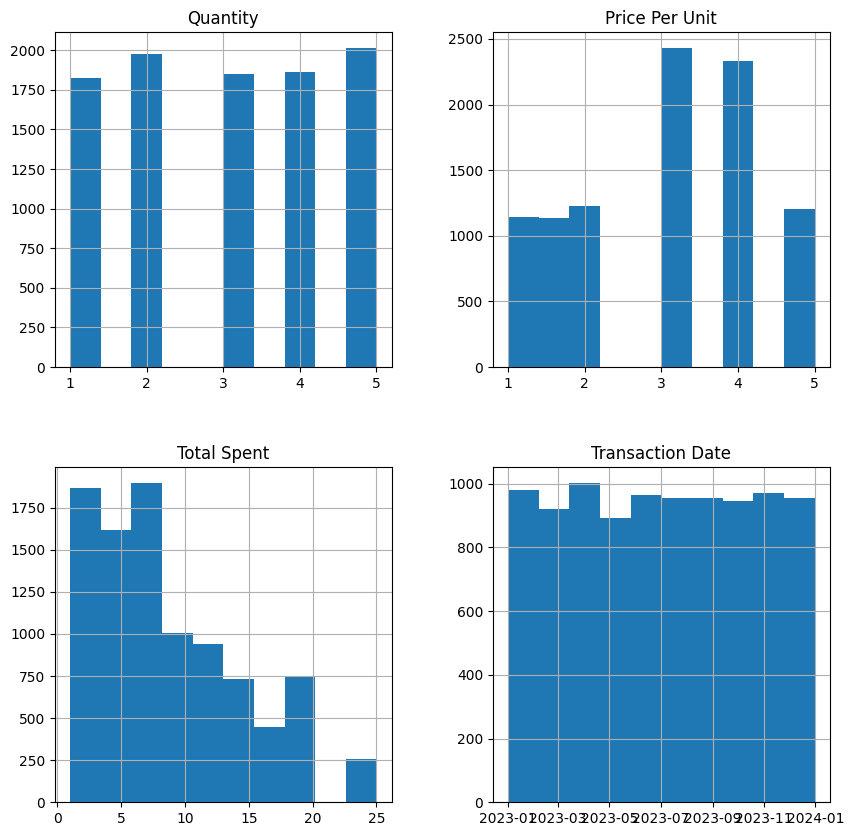

In [12]:
df.hist(figsize=(10,10))
plt.show()

In [13]:
df['Item'].fillna(df['Item'].mode()[0], inplace=True)
df['Payment Method'].fillna(df['Payment Method'].mode()[0], inplace=True)
df['Location'].fillna(df['Location'].mode()[0], inplace=True)
df['Quantity'].fillna(df['Quantity'].mean(), inplace=True)
df['Price Per Unit'].fillna(df['Price Per Unit'].mean(), inplace=True)
df['Total Spent'].fillna(df['Total Spent'].median(), inplace=True)

<ipython-input-13-d5ab02dee443>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item'].fillna(df['Item'].mode()[0], inplace=True)
<ipython-input-13-d5ab02dee443>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [14]:
df = df.sort_values(by="Transaction Date", ascending=True)

In [15]:
df['Transaction Date'] = df['Transaction Date'].ffill()

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 8015 to 9988
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  object        
 2   Quantity          10000 non-null  float64       
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       10000 non-null  float64       
 5   Payment Method    10000 non-null  object        
 6   Location          10000 non-null  object        
 7   Transaction Date  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 703.1+ KB


In [18]:
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    print("lower_bound: ", lower_bound)
    upper_bound = Q3 + 1.5 * IQR
    print("upper_bound:", upper_bound)
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers


outliers = detect_outliers(df['Total Spent'])
print("\nTotal Spent:\n",outliers)

lower_bound:  -8.0
upper_bound: 24.0

Total Spent:
 546     25.0
2224    25.0
9791    25.0
3129    25.0
7713    25.0
        ... 
4392    25.0
5153    25.0
5911    25.0
6611    25.0
8579    25.0
Name: Total Spent, Length: 259, dtype: float64


In [19]:
df.describe()

,Quantity,Price Per Unit,Total Spent,Transaction Date
count,10000.000000,10000.000000,10000.00000,10000
mean,3.028463,2.949984,8.87795,2023-07-10 07:58:56.640000
min,1.000000,1.000000,1.00000,2023-01-01 00:00:00
25%,2.000000,2.000000,4.00000,2023-04-06 00:00:00
50%,3.000000,3.000000,8.00000,2023-07-11 00:00:00
75%,4.000000,4.000000,12.00000,2023-10-15 00:00:00
max,5.000000,5.000000,25.00000,2023-12-31 00:00:00
std,1.384601,1.243910,5.86059,NaN


In [20]:
df['Total Spent'].value_counts()

,count
Total Spent,
8.0,1179
6.0,979
12.0,939
3.0,930
4.0,923
20.0,746
15.0,734
10.0,524
2.0,497


In [21]:
df['Total Spent'] = df['Total Spent'].clip(lower=1,upper=20)

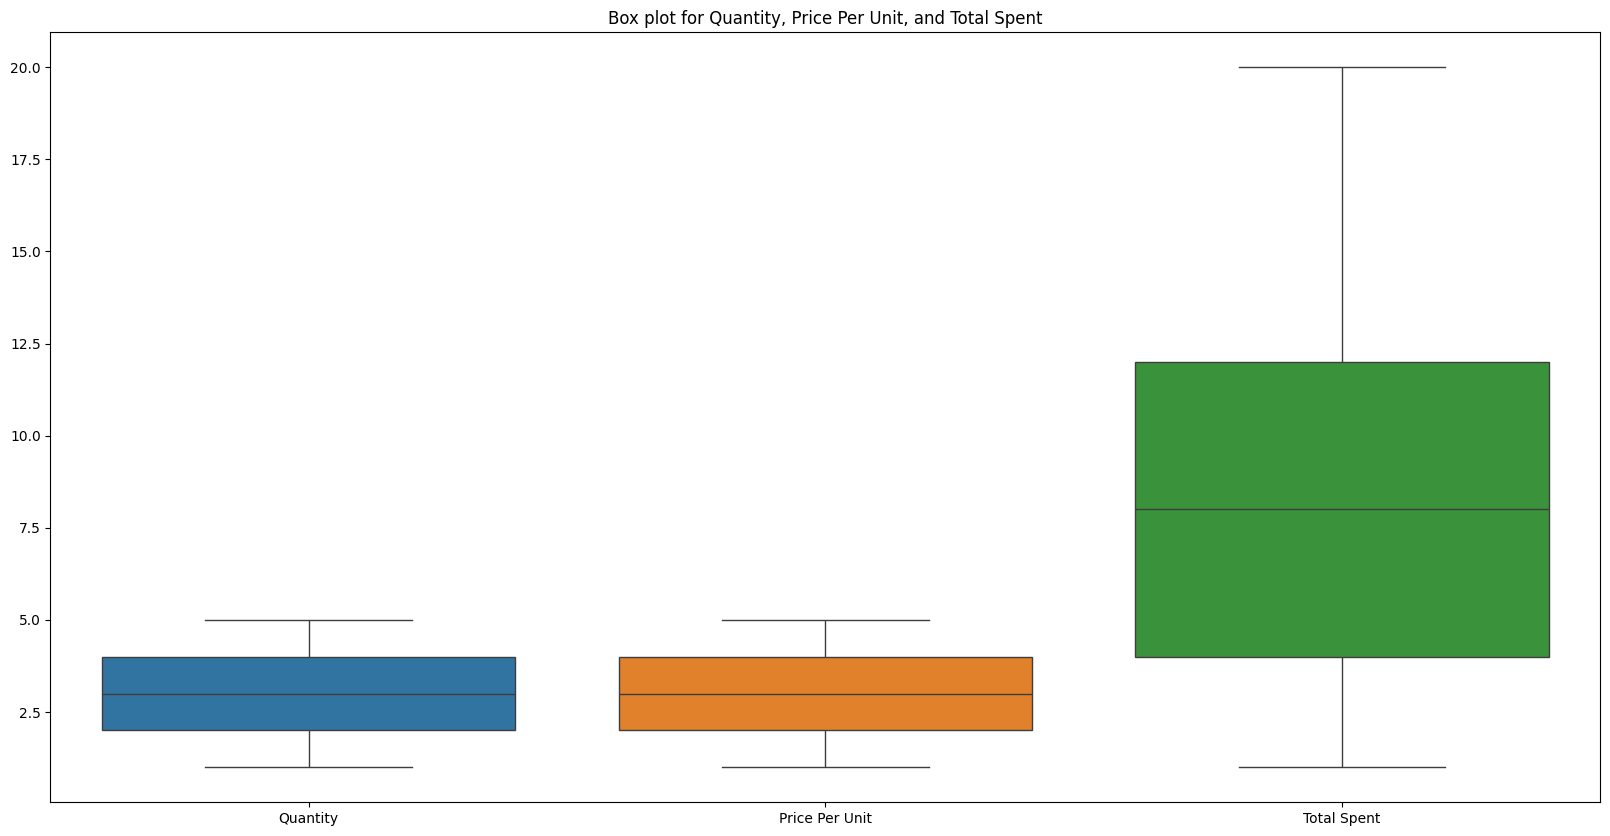

In [22]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[['Quantity', 'Price Per Unit', 'Total Spent']])
plt.title('Box plot for Quantity, Price Per Unit, and Total Spent')
plt.show()

In [31]:
df['Month'] = df['Transaction Date'].dt.month
df['month_name'] = df['Transaction Date'].dt.month_name()
df['Year'] = df['Transaction Date'].dt.year
df['Day'] = df['Transaction Date'].dt.day
df['Month to_period'] = df['Transaction Date'].dt.to_period('M')
df['Day'] = df['Transaction Date'].dt.day
df['Hour'] = df['Transaction Date'].dt.hour
df['DayOfWeek'] = df['Transaction Date'].dt.dayofweek

In [23]:
df['Total Sales'] = df['Quantity'] * df['Price Per Unit']

In [32]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Total Sales,Month,Day,Hour,DayOfWeek,Month to_period,month_name,Year
8015,TXN_4801947,Juice,1.0,3.000000,3.0,Digital Wallet,Takeaway,2023-01-01,3.000000,1,1,0,6,2023-01,January,2023
9063,TXN_9161256,Smoothie,2.0,4.000000,8.0,Digital Wallet,In-store,2023-01-01,8.000000,1,1,0,6,2023-01,January,2023
7309,TXN_6093955,Tea,5.0,1.500000,8.0,Digital Wallet,Takeaway,2023-01-01,7.500000,1,1,0,6,2023-01,January,2023
1425,TXN_8842223,Sandwich,5.0,2.949984,20.0,Digital Wallet,In-store,2023-01-01,14.749921,1,1,0,6,2023-01,January,2023
1777,TXN_7367474,Juice,5.0,3.000000,15.0,Digital Wallet,Takeaway,2023-01-01,15.000000,1,1,0,6,2023-01,January,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9933,TXN_9460419,Cake,1.0,3.000000,3.0,Digital Wallet,Takeaway,2023-12-31,3.000000,12,31,0,6,2023-12,December,2023
9937,TXN_8253472,Cake,1.0,3.000000,3.0,Digital Wallet,Takeaway,2023-12-31,3.000000,12,31,0,6,2023-12,December,2023
9949,TXN_3130865,Juice,3.0,3.000000,9.0,Digital Wallet,In-store,2023-12-31,9.000000,12,31,0,6,2023-12,December,2023
9983,TXN_9226047,Smoothie,3.0,4.000000,12.0,Cash,Takeaway,2023-12-31,12.000000,12,31,0,6,2023-12,December,2023


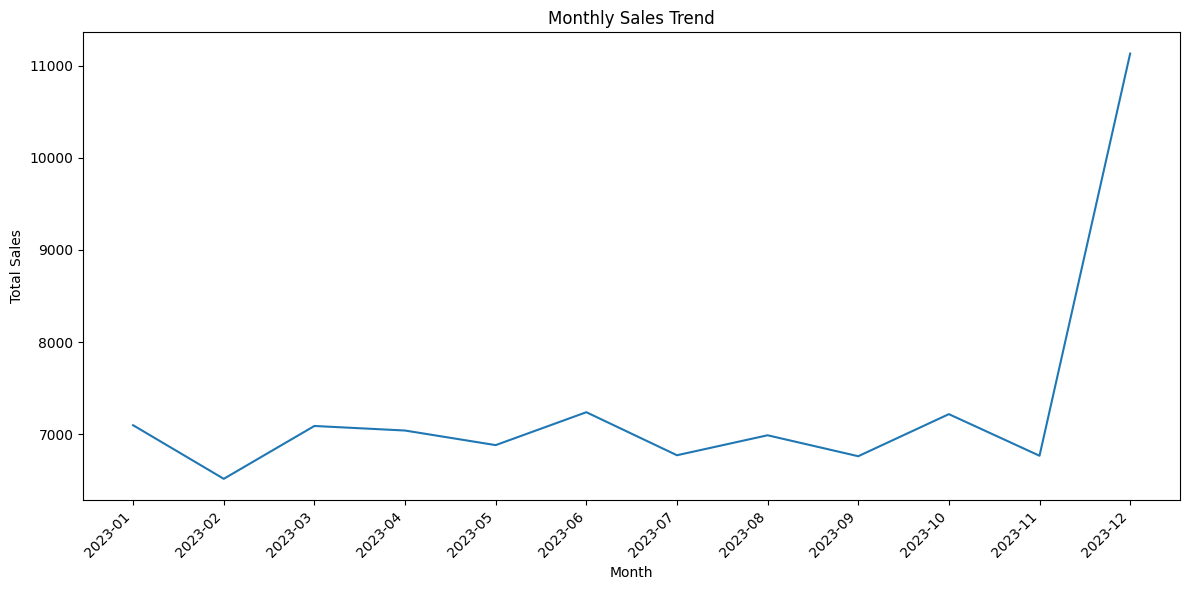

In [37]:
monthly_sales = df.groupby('Month to_period')['Total Spent'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


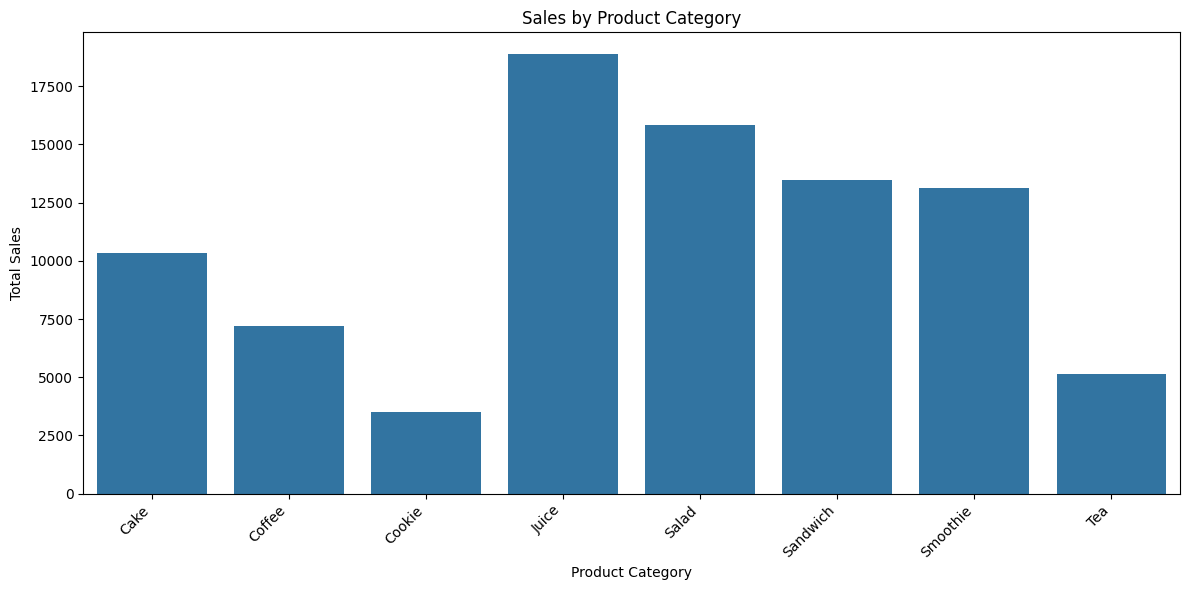

In [38]:
sales_by_category = df.groupby('Item')['Total Spent'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Sales by Product Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


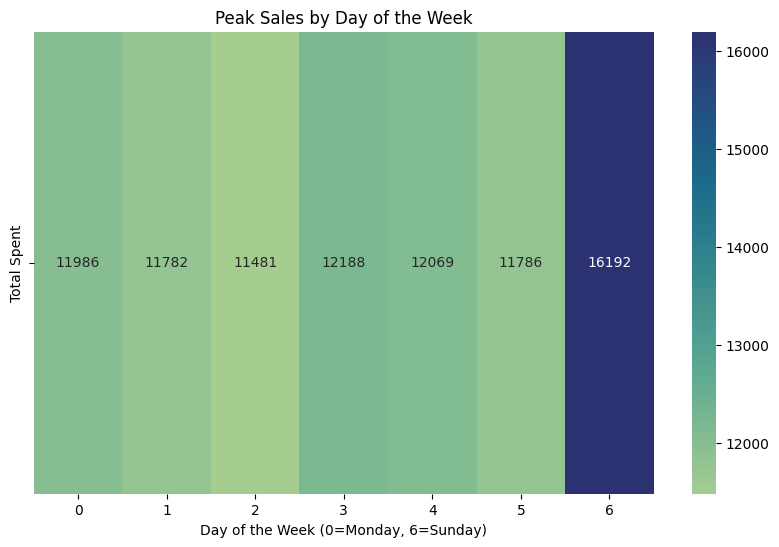

In [45]:
sales_by_day = df.groupby('DayOfWeek')['Total Spent'].sum()
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(sales_by_day).T, annot=True, fmt=".0f", cmap="crest")
plt.title('Peak Sales by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.show()
